# Titanic - Survived / Not Survived

By: Andrew Wairegi

**Definitions:**

*   PassengerId - Id of passenger
*   Survived - Survived or not
*   Pclass - Passenger class
*   Name - Name of passenger
*   Sex - Gender of passenger
*   Age - Age of passenger
*   SibSp - Number of spouses and siblings aboard
*   Parch - Number of Parents and Children aboard
*   Ticket - Ticket number
*   Fare - Cost of the ticket
*   Cabin - Cabin number on the ship
*   Embarked - Where they boarded from (S - Southampton, C - Cherbourg, Q - Queenstown)

## 1. Defining the Question

<a name = "defining_question">

### a) Specifying the question

To predict whether a passenger on the titanic would survive the crash or not. Given the variables that are available

### b) Defining the metric for success

The model can predict the survival rate of the passengers with 80%. If it can predict that a passenger will survive, with an accuracy of 80%. Then it is a successful model. 

### c) Understanding the context

The titanic crash took place in the 20th century. It was the biggest boat crash of that time. With the data that we have available of the passengers. We should be able to predict whether a titanic passenger will survive or not. When it meets a iceberg.

### d) Experimental design

Process:
1. <a href = "#defining_question">  Defining the question </a>
2. <a href = "#data_loading"> Reading the data </a>
3. <a href = "#previewing_data"> Previewing the data </a>
4. <a href = "#cleaning_data"> Data cleaning </a>
5. <a href = "#data_preparation"> Data preparation </a>
6. <a href = "#EDA"> Exploratory data analysis </a>
7. <a href = "#implementing_solution"> Implementing the solution </a>
8. <a href = "#challenging_solution"> Challenging the solution </a>
9. <a href = "#conclusion"> Conclusion </a>
10. <a href = "#recommendation"> Recommendation </a>
11. <a href = "#follow_questions"> Follow up questions </a>

### e) Data relevance

The data is relevant because it was sourced from the original titanic ship. It was sourced from the researchers that lived at that time. They sourced it from what they could find about the passengers onboard the ship. This was then used in later machine learning models to predict whether a passenger would survive or not. It is the same dataset that we are using today.

## 2. Reading the Data

<a name="data_loading"/>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the data
df = pd.read_csv("titanic.csv")
df.head() 

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## 3. Previewing the Data

<a name = "previewing_data"/>

In [ ]:
# Number of records
df.shape

(891, 12)

In [ ]:
# Top of dataset
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
# Tail of dataset
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [ ]:
# Checking for appropriate datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. Data Cleaning

<a name = "cleaning_data">

In [ ]:
# 1. Dropping unnecassery columns
df.drop(["Name", "Ticket", "Cabin"], axis = 1, inplace = True)

In [ ]:
# 2. Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [ ]:
# Filling in the null values
df["Age"] = df["Age"].fillna(value = df["Age"].mean(), axis = 0)

In [ ]:
# Dropping rows with null values
df.dropna(axis = 0, subset = ["Embarked"], inplace = True)

In [ ]:
# Checking for null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# 3. Checking for duplicate rows
df.duplicated().sum()

0

In [ ]:
# 4. Dropping other unnecassery columns
df.drop(["PassengerId"], axis = 1, inplace = True)

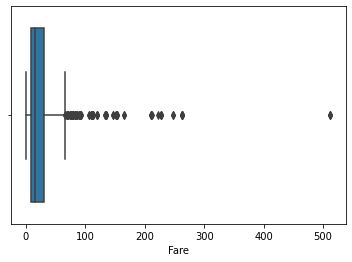

In [ ]:
# 5. Checking for outliers
sns.boxplot(data = df, x = "Fare")

In [ ]:
# There are a few outliers. However,
# there are different classes on the ship. So the highest
# paid one might be the most expensive one. For example a deluxe
# suite.

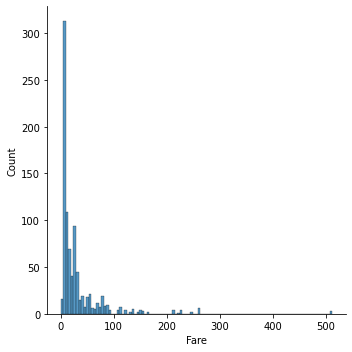

In [ ]:
# 6. Checking for anomalies
sns.displot(data = df, x = "Fare")

In [ ]:
# Looks ok.
# Most fares are around 5 / 10 dollars.
# Which is fine. As it is not a very expensive
# cruise.

## 5. Data Preparation

<a name = "data_preparation">

In [ ]:
# Convert string columns to numerical columns

In [ ]:
# Label encoding
df["Sex"] = df["Sex"].replace({"male": 1, "female": 0})

In [ ]:
# One-hot encoding
df["Embarked_original"] = df["Embarked"]
df = pd.get_dummies(data = df, columns = ["Embarked"], drop_first = True)

In [ ]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked_original  \
0         0       3    1  22.0      1      0   7.2500                 S   
1         1       1    0  38.0      1      0  71.2833                 C   
2         1       3    0  26.0      0      0   7.9250                 S   
3         1       1    0  35.0      1      0  53.1000                 S   
4         0       3    1  35.0      0      0   8.0500                 S   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [ ]:
# Note: I will not do standardization.
# As I do not want to loose any data that I have from
# the Fare or Age column. As that would reduce the accuracy of
# the model

## 6. Exploratory Data Analysis

<a name = "EDA">

In [ ]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked_original  \
0         0       3    1  22.0      1      0   7.2500                 S   
1         1       1    0  38.0      1      0  71.2833                 C   
2         1       3    0  26.0      0      0   7.9250                 S   
3         1       1    0  35.0      1      0  53.1000                 S   
4         0       3    1  35.0      0      0   8.0500                 S   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

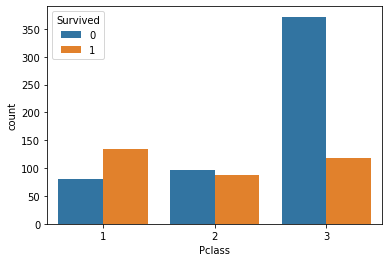

In [ ]:
sns.countplot(data = df, x = "Pclass", hue = "Survived")

In [ ]:
# It seems those in first and second class survived
# more. It's probably that they were given priority.
# Over the other passengers.

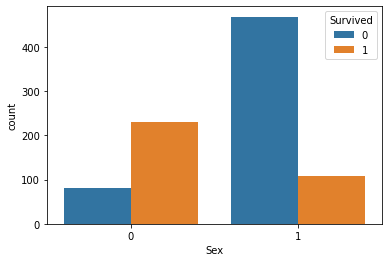

In [ ]:
sns.countplot(data = df, x = "Sex", hue = "Survived")

In [ ]:
# It's seems females were much more likely
# to survive than men.

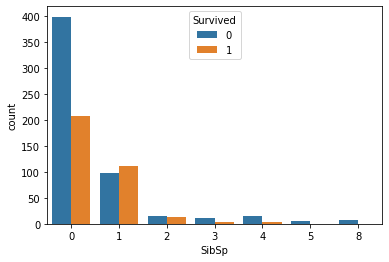

In [ ]:
sns.countplot(data = df, x = "SibSp", hue = "Survived")

In [ ]:
# It seems if you had 1/2 brothers/spouses
# you more likely to survive. As thise were only ones,
# where almost half the people survived as didn't survive

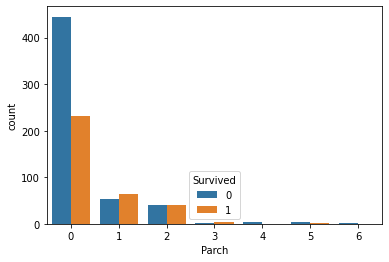

In [ ]:
sns.countplot(data = df, x = "Parch", hue = "Survived")

In [ ]:
# It seems if you had 1 - 3 parents/
# children. You were more likely to survive
# as they may have helped you onboard the life rafts.

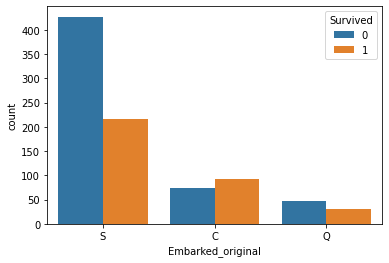

In [ ]:
sns.countplot(data = df, x = "Embarked_original", hue = "Survived")

In [ ]:
# S - Southampton, C - Cherbourg, Q - Queenstown

In [ ]:
# It seems those who came from Cherbourg had a much higher
# chance of surviving, than those from Southampton. Also Queenstown
# had quite a high survival rate.

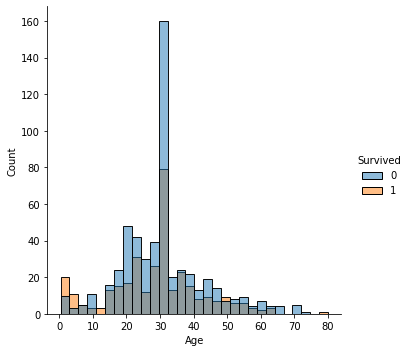

In [ ]:
sns.displot(data = df, x = "Age", hue = "Survived")

In [ ]:
# It seems the young and the old
# were given the most priority. As most babies
# survived, and more elderly people. When compared to
# the middle, where most of them did no survive.
# When you look at the ratios.

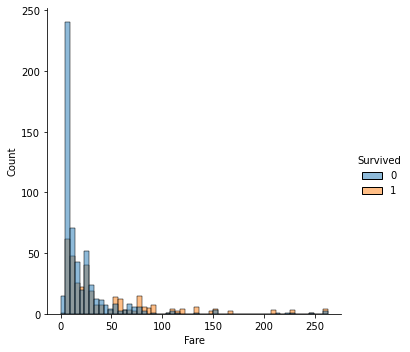

In [ ]:
sns.displot(data = df[df["Fare"] < 300], x = "Fare", hue = "Survived")

In [ ]:
# It seems those that paid more had a much higher chance
# of surviving. Which means they were most likely given
# priority. Over the lower paying passengers.

## 7. Implementing the solution

<a name = "implementing_solution">

Dropping unneeded columns

In [ ]:
df.drop("Embarked_original", axis = 1, inplace = True) # Not needed after visualizations

Importing libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Creating variable

In [ ]:
accuracies = []

X & Y

In [ ]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

Check for best K-value

In [ ]:
for k_value in range(1, 17):
  Knn = KNeighborsClassifier(weights = "distance", metric = "euclidean", n_neighbors = k_value)
  Knn.fit(X_train, y_train)
  predictions = Knn.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracies.append(accuracy)

Graphing

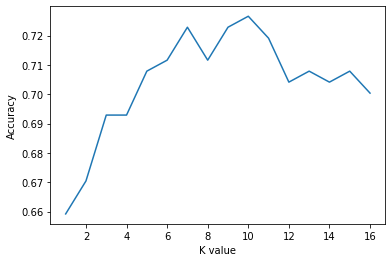

In [ ]:
lineplot = sns.lineplot(x = range(1, 17), y = accuracies)
lineplot.set_xlabel("K value")
lineplot.set_ylabel("Accuracy")
lineplot

In [ ]:
# The best k-value was about 7. So we'll use that for the models.

Final Model

In [ ]:
KNN = KNeighborsClassifier(weights = "distance", metric = "euclidean", n_neighbors = 7)
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)

Evaluation

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       163
           1       0.65      0.63      0.64       104

    accuracy                           0.72       267
   macro avg       0.71      0.71      0.71       267
weighted avg       0.72      0.72      0.72       267



We achieved an average accuracy of 71%. Which is good. It means that our model performed well, with a K Neareset Neighbor classifier.

## 8. Challenging the solution

<a name = "challenging_solution">

While this algorithm may work. It may be better to use another model, for example a logisitic regression model. As this model requires that you have existing data points in place, to classify classes. While a logisitic regression model is more suited for classification. Also when the company wants to classify data from another passenger set. It may get errors, as we are trying to classify data using existing data points. So it is unusable in another dataset.

## Conclusion

<a name = "conclusion">

In conclusion I believe that the company may be able to use this model, to predict whether a passenger will survive or not. However, the accuracy will not be very good. Also I believe they can understand what kind of factors, ship crew think about when saving individuals from the exploratory data analysis. They can also use this to advise crew members on how they should save individuals. 

## Recommendation

<a name = "recommendation">

I recommend that the boat company uses the final model. To ensure that they get the best results from their predictions. This will allow them to be able to predict survival rates on everyday cruises. With much accuracy.

## 11. Follow up questions

<a name = "follow_questions">

### a) Did we have the right data ?

Yes, we had the right data. Because it had the information about the passengers, and what we wanted to identify was whether one set of passengers had a higher survival rate than the other. Which would allow us to be able to predict survival rate of passengers on boats.

### b) Do we need other data to answer our question ?

No, because this was one of the biggest crashes in the century. So it would have the most accurate data. In terms of who would survive from a boat crash, in the future. However, this would mainly apply to more mainstream boat rides. As they would try to prioritise one group over another in a crash.

### c) Did we have the right question ?

Yes, we had a right question. Because this data is mainly focused around the crash. However, it could be used to analyse other areas. For example catering focus points. However more data would be needed to analyse that. As well as this it would need to be gotten from an external source. As the titanic's data files, most likely did not have any other extra data, other than demographics. 

<br>
<center> <h4> <b> Copyright © Andrew Wairegi </b> </h4> </center>

